## Table of Contents
* [Section A: Libraries list](#Section_1)
* [Section B: Main Dataframe](#Section_2)
* [Section C: Filter Dataframe](#Section_3)
    * [Non Node Filters](#Section_31)
    * [Node Filters](#Section_32)
    * [Numeric Filters](#Section_33)
* [Section D: Subset Dataframe](#Section_4)
* [Section E: KG Set Up](#Section_5) 
    * [Creating Unique Lists](#Section_51)
    * [Coloring nodes based on no. of connections](#Section_52)

## Libraries <a class="anchor" id="Section_1"></a>

In [1]:
#Importing Libraries
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings; 
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.validators.scatter.marker import SymbolValidator
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


import plotly

## Main Dataframe <a class="anchor" id="Section_2"></a>

### Accern dataset

In [2]:
#Full dataset
data_file = 'columbia_capstone_fall2020_esg.csv'
data = pd.read_csv(data_file, parse_dates = ['crawled_at','harvested_at','published_at'])

In [3]:
#Key variables needed in dataset
data = data[['published_at','entity_name','entity_region','entity_sector','entity_ticker','event_group','event','doc_id','doc_title','doc_source','doc_type','entity_country','entity_relevance','entity_sentiment','event_relevance','doc_sentiment','event_sentiment','signal_id','signal_relevance','signal_sentiment']]

In [4]:
data = data.fillna("None")

In [5]:
data['published_at'] = data['published_at'].dt.date
data['published_at'] =  pd.to_datetime(data['published_at'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554606 entries, 0 to 554605
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   published_at      554606 non-null  datetime64[ns]
 1   entity_name       554606 non-null  object        
 2   entity_region     554606 non-null  object        
 3   entity_sector     554606 non-null  object        
 4   entity_ticker     554606 non-null  object        
 5   event_group       554606 non-null  object        
 6   event             554606 non-null  object        
 7   doc_id            554606 non-null  object        
 8   doc_title         554606 non-null  object        
 9   doc_source        554606 non-null  object        
 10  doc_type          554606 non-null  object        
 11  entity_country    554606 non-null  object        
 12  entity_relevance  554606 non-null  float64       
 13  entity_sentiment  554606 non-null  float64       
 14  even

In [6]:
data.nunique()

published_at           292
entity_name           7090
entity_region            8
entity_sector           20
entity_ticker         6835
event_group              3
event                   23
doc_id              391180
doc_title           261420
doc_source           31490
doc_type                 2
entity_country          57
entity_relevance      7431
entity_sentiment     59443
event_relevance       1113
doc_sentiment       182314
event_sentiment      38702
signal_id           554606
signal_relevance     19381
signal_sentiment    138004
dtype: int64

## Filter Dataframe<a class="anchor" id="Section_3"></a>

#### Non-Node filters<a class="anchor" id="Section_31"></a>

In [7]:
eg_list = data['event_group'] #['Social','Environment']
region_list = data['entity_region'] #['Americas','Europe'] 
country_list = data['entity_country'] #['','']
doctype_list = data['doc_type'] #['news'] 
source_list = data['doc_source'] #doc_source
#published_at
p_startdate = '2020-01-01' #data['published_at'].min()
p_enddate = data['published_at'].max() #'2020-01-04'

#### Node filters<a class="anchor" id="Section_32"></a>

In [8]:
#OR LISTS (e.g. amazon or apple / data security or water waste)
entity_list = data['entity_name'] #['BOMBARDIER INC-A','Apple Inc']
event_list = data['event'] #['Environment - Water Waste Management - SASB','Environment - Energy Management - SASB']
sector_list = data['entity_sector'] #['','']
doc_list = data['doc_title'] #['']

In [9]:
#AND FILTERS (e.g. these events AND these sectors, etc)
data_filter = data[(data['event_group'].isin(eg_list)) &\
                   (data['entity_region'].isin(region_list)) &\
                  (data['entity_country'].isin(country_list)) &\
                  (data['doc_type'].isin(doctype_list)) &\
                  (data['doc_source'].isin(source_list)) &\
                  (data['published_at'] >= p_startdate) & (data['published_at'] <= p_enddate) &\
                      #node filters
                   (data['event'].isin(event_list)) &\
                  (data['entity_sector'].isin(sector_list)) &\
                   (data['entity_name'].isin(entity_list)) &\
                   (data['doc_title'].isin(doc_list))] 

In [10]:
a = data.groupby('entity_name')['doc_id'].count().reset_index(name = 'doc_count')

In [11]:
a

,entity_name,doc_count
0,01 COMMUNIQUE LABORATORY INC,42
1,21ST CENTURY TECHNOLOGY PLC,2
2,22nd Century Group Inc,46
3,2U INC,2
4,2VALORISE NV,2
...,...,...
7085,ZURICH INSURANCE GROUP AG,50
7086,ZYMEWORKS INC,4
7087,Zhuzhou CRRC Times Electric Co Ltd H,4
7088,argenx SE,45


/Users/shashank/opt/anaconda3/envs/Anomaly/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='doc_count'>

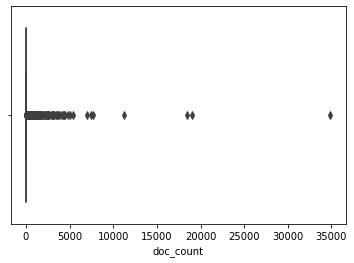

In [12]:
sns.boxplot(a['doc_count'])

## Subset dataframe<a class="anchor" id="Section_4"></a>

#subsetting for finding documents with multiple counts
doc_count = data["doc_id"].value_counts()
doc_list = doc_count[0:2]
doc_list

temp_data = data[data["doc_id"]=="5ef9d911a656f21acc8e649a"]
temp_data = temp_data[:4]

#Subsetting to data security events only
ds_industrial = data[data["entity_sector"]=="Industrials"]
ds_industrial = ds_industrial[0:6]

#Subsetting to technology industry that do not have data security as event
ds_technology = data.loc[(data["entity_sector"] == "Technology")]
ds_technology = ds_technology[3:8]

#Combining above subsets
temp_data = pd.concat([ds_industrial, ds_technology])

temp_data = data[data["entity_name"] == 'AIR FRANCE-KLM']
temp_data

In [13]:
temp_data = data[0:10]
temp_data

,published_at,entity_name,entity_region,entity_sector,entity_ticker,event_group,event,doc_id,doc_title,doc_source,doc_type,entity_country,entity_relevance,entity_sentiment,event_relevance,doc_sentiment,event_sentiment,signal_id,signal_relevance,signal_sentiment
0,2020-01-01,INMED PHARMACEUTICALS INC,Americas,Healthcare,IN,Environment,Environment - Water Waste Management - SASB,5f4e439ebf509771e9824533,THE EFFECTS OF WASTEWATER TREATMENT PLANT EFFL...,https://macsphere.mcmaster.ca:443,blog,Canada,100.0000,-25.0000,100.0,1.2561,1.0417,7cfc584d-044d-4585-a154-2d552d4cda42,50.000,-11.9791
1,2020-01-01,Adani Green Energy Ltd,Asia,Utilities,ADANIGR,Environment,Environment - Energy Management - SASB,5e0c21924ed9470001e18c26,Adani Green jumps 5% on commissioning of new p...,ACCERN: moneycontrol.com,news,India,100.0000,14.0625,90.0,11.8923,9.7222,53d7f8ec-dc85-4dee-9d69-24332280bb8d,47.500,11.8923
2,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca8884ed9470001e1eb00,Print - Bombardiers joint venture wins contrac...,ACCERN: globenewswire.com,news,Canada,37.5000,9.5325,90.0,22.3100,30.0347,90f6ebba-71a2-4d8a-8a5f-233a63ca9236,31.875,19.7836
3,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca7ef6a72090001b7e687,Bombardiers joint venture wins contract to bui...,ACCERN: globenewswire.com,news,Canada,22.5000,12.0915,90.0,25.0589,30.0347,584cb3f0-e440-4fc4-8488-0182d2ffcf3b,28.125,21.0631
4,2020-01-01,Procter & Gamble Company,Asia,Consumer Non Cyclicals,PG,Environment,Environment - GHG Emissions - SASB,5f67573a041a0320d192aae0,Design and systems-level performance analysis ...,https://macsphere.mcmaster.ca:443,blog,India,30.0000,-55.5556,90.0,-7.6967,11.8056,08b16193-7b1c-45a4-887c-8eefa73d230c,30.000,-55.5556
5,2020-01-01,TEIJIN LTD,None,None,3401,Social,Social - Data Security - SASB,5e0ce6b70fbbf50001894788,"Analysts Downgrades for January, 1st (SAUHF, S...",ACCERN: americanbankingnews.com,news,None,18.4821,7.1429,90.0,2.7400,12.1032,67017bd2-e233-4d33-a5a6-3262117a2e01,54.241,9.6230
6,2020-01-01,Alphabet Inc,Europe,Technology,GOOGL,Governance,Governance - Product Design & Lifecycle Manage...,5e87b19d3f5416001d10019f,Google will finally stop using controversial I...,The Verge,news,United Kingdom,100.0000,12.2685,90.0,13.0787,13.8889,28df0bdd-b1c9-453a-973f-d4e73dfda5a2,95.000,13.0787
7,2020-01-01,Illumina Inc,Europe,Healthcare,ILMN,Environment,Environment - Energy Management - SASB,5e87b1d33f541600191018cb,Occurrence of Thermophilic Microorganisms in D...,mdpi.com,news,United Kingdom,52.5000,11.1111,90.0,9.0856,11.1111,122e7b5b-202b-4f0d-a1c8-aee50dcf0865,71.250,11.1111
8,2020-01-01,YAMAHA CORP,None,None,7951,Governance,Governance - Product Design & Lifecycle Manage...,5e87b1c33f5416001d10106a,Monster Energy Star Yamaha Racing Announces 20...,Cycle News,news,None,100.0000,59.1611,100.0,60.2863,72.1302,79f74053-eef5-45d9-a9c4-77270b45c2a2,50.000,65.6456
9,2020-01-01,AGTHIA GROUP PJSC,Middle East,Consumer Staples,AGTHIA,Environment,Environment - Energy Management - SASB,5e87b1c33f5416001d10106a,Monster Energy Star Yamaha Racing Announces 20...,Cycle News,news,United Arab Emirates,100.0000,68.9931,100.0,60.2863,72.1302,6d7fec94-e908-4167-b7f6-7a4580c3064a,50.000,70.5616


In [14]:
#ensure there is no null values
temp_data.isna().sum()

published_at        0
entity_name         0
entity_region       0
entity_sector       0
entity_ticker       0
event_group         0
event               0
doc_id              0
doc_title           0
doc_source          0
doc_type            0
entity_country      0
entity_relevance    0
entity_sentiment    0
event_relevance     0
doc_sentiment       0
event_sentiment     0
signal_id           0
signal_relevance    0
signal_sentiment    0
dtype: int64

temp_data

## Counts for Node Size

#### Calculating no. of documents

In [15]:
doc_count = temp_data.groupby('doc_id')['doc_id'].count().reset_index(name = 'doc_count')

In [16]:
temp_data = pd.merge(temp_data, doc_count , on = 'doc_id', how = 'left')

#### Calculating no. of documents per entity

In [17]:
entity_wise_doc_count = temp_data.groupby('entity_name')['doc_id'].count().reset_index(name = 'doc_count_per_entity')

In [18]:
temp_data = pd.merge(temp_data, entity_wise_doc_count , on = 'entity_name', how = 'left')

#### Calculating no. of documents per event

In [19]:
event_wise_doc_count = temp_data.groupby('event')['doc_id'].count().reset_index(name = 'doc_count_per_event')

In [20]:
temp_data = pd.merge(temp_data, event_wise_doc_count , on = 'event', how = 'left')

#### Calculating no. of documents per sector

In [21]:
sector_wise_doc_count = temp_data.groupby('entity_sector')['doc_id'].count().reset_index(name = 'doc_count_per_sector')
sector_wise_doc_count.head()

,entity_sector,doc_count_per_sector
0,Consumer Non Cyclicals,1
1,Consumer Staples,1
2,Healthcare,2
3,Industrials,2
4,None,2


In [22]:
temp_data = pd.merge(temp_data, sector_wise_doc_count , on = 'entity_sector', how = 'left')
temp_data.head()

,published_at,entity_name,entity_region,entity_sector,entity_ticker,event_group,event,doc_id,doc_title,doc_source,...,event_relevance,doc_sentiment,event_sentiment,signal_id,signal_relevance,signal_sentiment,doc_count,doc_count_per_entity,doc_count_per_event,doc_count_per_sector
0,2020-01-01,INMED PHARMACEUTICALS INC,Americas,Healthcare,IN,Environment,Environment - Water Waste Management - SASB,5f4e439ebf509771e9824533,THE EFFECTS OF WASTEWATER TREATMENT PLANT EFFL...,https://macsphere.mcmaster.ca:443,...,100.0,1.2561,1.0417,7cfc584d-044d-4585-a154-2d552d4cda42,50.000,-11.9791,1,1,1,2
1,2020-01-01,Adani Green Energy Ltd,Asia,Utilities,ADANIGR,Environment,Environment - Energy Management - SASB,5e0c21924ed9470001e18c26,Adani Green jumps 5% on commissioning of new p...,ACCERN: moneycontrol.com,...,90.0,11.8923,9.7222,53d7f8ec-dc85-4dee-9d69-24332280bb8d,47.500,11.8923,1,1,5,1
2,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca8884ed9470001e1eb00,Print - Bombardiers joint venture wins contrac...,ACCERN: globenewswire.com,...,90.0,22.3100,30.0347,90f6ebba-71a2-4d8a-8a5f-233a63ca9236,31.875,19.7836,1,2,5,2
3,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca7ef6a72090001b7e687,Bombardiers joint venture wins contract to bui...,ACCERN: globenewswire.com,...,90.0,25.0589,30.0347,584cb3f0-e440-4fc4-8488-0182d2ffcf3b,28.125,21.0631,1,2,5,2
4,2020-01-01,Procter & Gamble Company,Asia,Consumer Non Cyclicals,PG,Environment,Environment - GHG Emissions - SASB,5f67573a041a0320d192aae0,Design and systems-level performance analysis ...,https://macsphere.mcmaster.ca:443,...,90.0,-7.6967,11.8056,08b16193-7b1c-45a4-887c-8eefa73d230c,30.000,-55.5556,1,1,1,1


## Event Sentiment Calculation

In [23]:
#Doc title - Creating avg doc_sentiment
event_avg_sentiment = temp_data.groupby('event')['event_sentiment'].mean().reset_index(name = "Avg Event Sentiment")

/Users/shashank/opt/anaconda3/envs/Anomaly/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Avg Event Sentiment'>

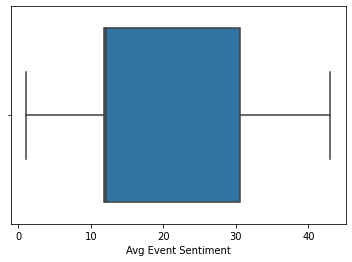

In [24]:
sns.boxplot(event_avg_sentiment['Avg Event Sentiment'])

In [25]:
#putting back into temp
temp_data = pd.merge(temp_data, event_avg_sentiment, on = 'event', how = 'left')
temp_data.head()

,published_at,entity_name,entity_region,entity_sector,entity_ticker,event_group,event,doc_id,doc_title,doc_source,...,doc_sentiment,event_sentiment,signal_id,signal_relevance,signal_sentiment,doc_count,doc_count_per_entity,doc_count_per_event,doc_count_per_sector,Avg Event Sentiment
0,2020-01-01,INMED PHARMACEUTICALS INC,Americas,Healthcare,IN,Environment,Environment - Water Waste Management - SASB,5f4e439ebf509771e9824533,THE EFFECTS OF WASTEWATER TREATMENT PLANT EFFL...,https://macsphere.mcmaster.ca:443,...,1.2561,1.0417,7cfc584d-044d-4585-a154-2d552d4cda42,50.000,-11.9791,1,1,1,2,1.04170
1,2020-01-01,Adani Green Energy Ltd,Asia,Utilities,ADANIGR,Environment,Environment - Energy Management - SASB,5e0c21924ed9470001e18c26,Adani Green jumps 5% on commissioning of new p...,ACCERN: moneycontrol.com,...,11.8923,9.7222,53d7f8ec-dc85-4dee-9d69-24332280bb8d,47.500,11.8923,1,1,5,1,30.60658
2,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca8884ed9470001e1eb00,Print - Bombardiers joint venture wins contrac...,ACCERN: globenewswire.com,...,22.3100,30.0347,90f6ebba-71a2-4d8a-8a5f-233a63ca9236,31.875,19.7836,1,2,5,2,30.60658
3,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca7ef6a72090001b7e687,Bombardiers joint venture wins contract to bui...,ACCERN: globenewswire.com,...,25.0589,30.0347,584cb3f0-e440-4fc4-8488-0182d2ffcf3b,28.125,21.0631,1,2,5,2,30.60658
4,2020-01-01,Procter & Gamble Company,Asia,Consumer Non Cyclicals,PG,Environment,Environment - GHG Emissions - SASB,5f67573a041a0320d192aae0,Design and systems-level performance analysis ...,https://macsphere.mcmaster.ca:443,...,-7.6967,11.8056,08b16193-7b1c-45a4-887c-8eefa73d230c,30.000,-55.5556,1,1,1,1,11.80560


## Entity Sentiment Calculation

In [26]:
entity_avg_sentiment = temp_data.groupby('entity_name')['entity_sentiment'].mean().reset_index(name = "Avg Entity Sentiment")

In [27]:
temp_data = pd.merge(temp_data, entity_avg_sentiment, on = 'entity_name', how = 'left')
temp_data.head()

,published_at,entity_name,entity_region,entity_sector,entity_ticker,event_group,event,doc_id,doc_title,doc_source,...,event_sentiment,signal_id,signal_relevance,signal_sentiment,doc_count,doc_count_per_entity,doc_count_per_event,doc_count_per_sector,Avg Event Sentiment,Avg Entity Sentiment
0,2020-01-01,INMED PHARMACEUTICALS INC,Americas,Healthcare,IN,Environment,Environment - Water Waste Management - SASB,5f4e439ebf509771e9824533,THE EFFECTS OF WASTEWATER TREATMENT PLANT EFFL...,https://macsphere.mcmaster.ca:443,...,1.0417,7cfc584d-044d-4585-a154-2d552d4cda42,50.000,-11.9791,1,1,1,2,1.04170,-25.0000
1,2020-01-01,Adani Green Energy Ltd,Asia,Utilities,ADANIGR,Environment,Environment - Energy Management - SASB,5e0c21924ed9470001e18c26,Adani Green jumps 5% on commissioning of new p...,ACCERN: moneycontrol.com,...,9.7222,53d7f8ec-dc85-4dee-9d69-24332280bb8d,47.500,11.8923,1,1,5,1,30.60658,14.0625
2,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca8884ed9470001e1eb00,Print - Bombardiers joint venture wins contrac...,ACCERN: globenewswire.com,...,30.0347,90f6ebba-71a2-4d8a-8a5f-233a63ca9236,31.875,19.7836,1,2,5,2,30.60658,10.8120
3,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca7ef6a72090001b7e687,Bombardiers joint venture wins contract to bui...,ACCERN: globenewswire.com,...,30.0347,584cb3f0-e440-4fc4-8488-0182d2ffcf3b,28.125,21.0631,1,2,5,2,30.60658,10.8120
4,2020-01-01,Procter & Gamble Company,Asia,Consumer Non Cyclicals,PG,Environment,Environment - GHG Emissions - SASB,5f67573a041a0320d192aae0,Design and systems-level performance analysis ...,https://macsphere.mcmaster.ca:443,...,11.8056,08b16193-7b1c-45a4-887c-8eefa73d230c,30.000,-55.5556,1,1,1,1,11.80560,-55.5556


/Users/shashank/opt/anaconda3/envs/Anomaly/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Avg Entity Sentiment'>

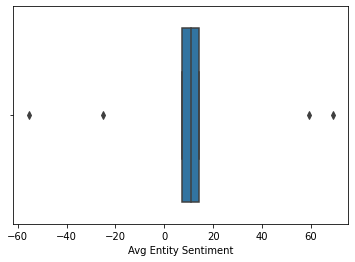

In [28]:
sns.boxplot(entity_avg_sentiment['Avg Entity Sentiment'])

## AVG Sector sentiment

In [29]:
result1 = temp_data[['entity_name','entity_sector']]

In [30]:
result2 = pd.merge(result1, entity_avg_sentiment , on = 'entity_name', how = 'left')
#deduplicate
result2 = result2.drop_duplicates(subset=['entity_name','entity_sector'], keep='first')

In [31]:
entity_wise_doc_count.head()

,entity_name,doc_count_per_entity
0,AGTHIA GROUP PJSC,1
1,Adani Green Energy Ltd,1
2,Alphabet Inc,1
3,BOMBARDIER INC-A,2
4,INMED PHARMACEUTICALS INC,1


In [32]:
result3 = pd.merge(entity_wise_doc_count, result2 , on = 'entity_name', how = 'left')

In [33]:
#Weighted AVG Calc
result3["entity_weighted_avg"]  = result3["doc_count_per_entity"] * result3["Avg Entity Sentiment"]

In [34]:
#Group by entity_sector 
result4 = result3.groupby('entity_sector')['entity_weighted_avg'].sum().reset_index(name = "Sum_entity_weighted_avg")

In [35]:
result5 = pd.merge(sector_wise_doc_count, result4 , on = 'entity_sector', how = 'left')
result5["Wt_Avg_sector_sentiment"] = result5['Sum_entity_weighted_avg'] / result5['doc_count_per_sector']

In [36]:
result6 = result5[['entity_sector','Wt_Avg_sector_sentiment']]
result6 #choosing 2 columns

,entity_sector,Wt_Avg_sector_sentiment
0,Consumer Non Cyclicals,-55.55560
1,Consumer Staples,68.99310
2,Healthcare,-6.94445
3,Industrials,10.81200
4,None,33.15200
5,Technology,12.26850
6,Utilities,14.06250


In [37]:
temp_data = pd.merge(temp_data, result6, on = 'entity_sector', how = 'left')
temp_data.head()

,published_at,entity_name,entity_region,entity_sector,entity_ticker,event_group,event,doc_id,doc_title,doc_source,...,signal_id,signal_relevance,signal_sentiment,doc_count,doc_count_per_entity,doc_count_per_event,doc_count_per_sector,Avg Event Sentiment,Avg Entity Sentiment,Wt_Avg_sector_sentiment
0,2020-01-01,INMED PHARMACEUTICALS INC,Americas,Healthcare,IN,Environment,Environment - Water Waste Management - SASB,5f4e439ebf509771e9824533,THE EFFECTS OF WASTEWATER TREATMENT PLANT EFFL...,https://macsphere.mcmaster.ca:443,...,7cfc584d-044d-4585-a154-2d552d4cda42,50.000,-11.9791,1,1,1,2,1.04170,-25.0000,-6.94445
1,2020-01-01,Adani Green Energy Ltd,Asia,Utilities,ADANIGR,Environment,Environment - Energy Management - SASB,5e0c21924ed9470001e18c26,Adani Green jumps 5% on commissioning of new p...,ACCERN: moneycontrol.com,...,53d7f8ec-dc85-4dee-9d69-24332280bb8d,47.500,11.8923,1,1,5,1,30.60658,14.0625,14.06250
2,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca8884ed9470001e1eb00,Print - Bombardiers joint venture wins contrac...,ACCERN: globenewswire.com,...,90f6ebba-71a2-4d8a-8a5f-233a63ca9236,31.875,19.7836,1,2,5,2,30.60658,10.8120,10.81200
3,2020-01-01,BOMBARDIER INC-A,Americas,Industrials,BBD/A,Environment,Environment - Energy Management - SASB,5e0ca7ef6a72090001b7e687,Bombardiers joint venture wins contract to bui...,ACCERN: globenewswire.com,...,584cb3f0-e440-4fc4-8488-0182d2ffcf3b,28.125,21.0631,1,2,5,2,30.60658,10.8120,10.81200
4,2020-01-01,Procter & Gamble Company,Asia,Consumer Non Cyclicals,PG,Environment,Environment - GHG Emissions - SASB,5f67573a041a0320d192aae0,Design and systems-level performance analysis ...,https://macsphere.mcmaster.ca:443,...,08b16193-7b1c-45a4-887c-8eefa73d230c,30.000,-55.5556,1,1,1,1,11.80560,-55.5556,-55.55560


/Users/shashank/opt/anaconda3/envs/Anomaly/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Wt_Avg_sector_sentiment'>

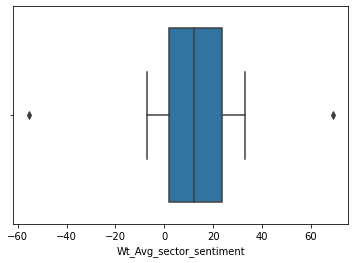

In [38]:
result6 = result5[['entity_sector','Wt_Avg_sector_sentiment']] #choose 2 columns
sns.boxplot(result6['Wt_Avg_sector_sentiment'])

/Users/shashank/opt/anaconda3/envs/Anomaly/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Weighted Average Sector Sentiment'}, xlabel='entity_sector', ylabel='Wt_Avg_sector_sentiment'>

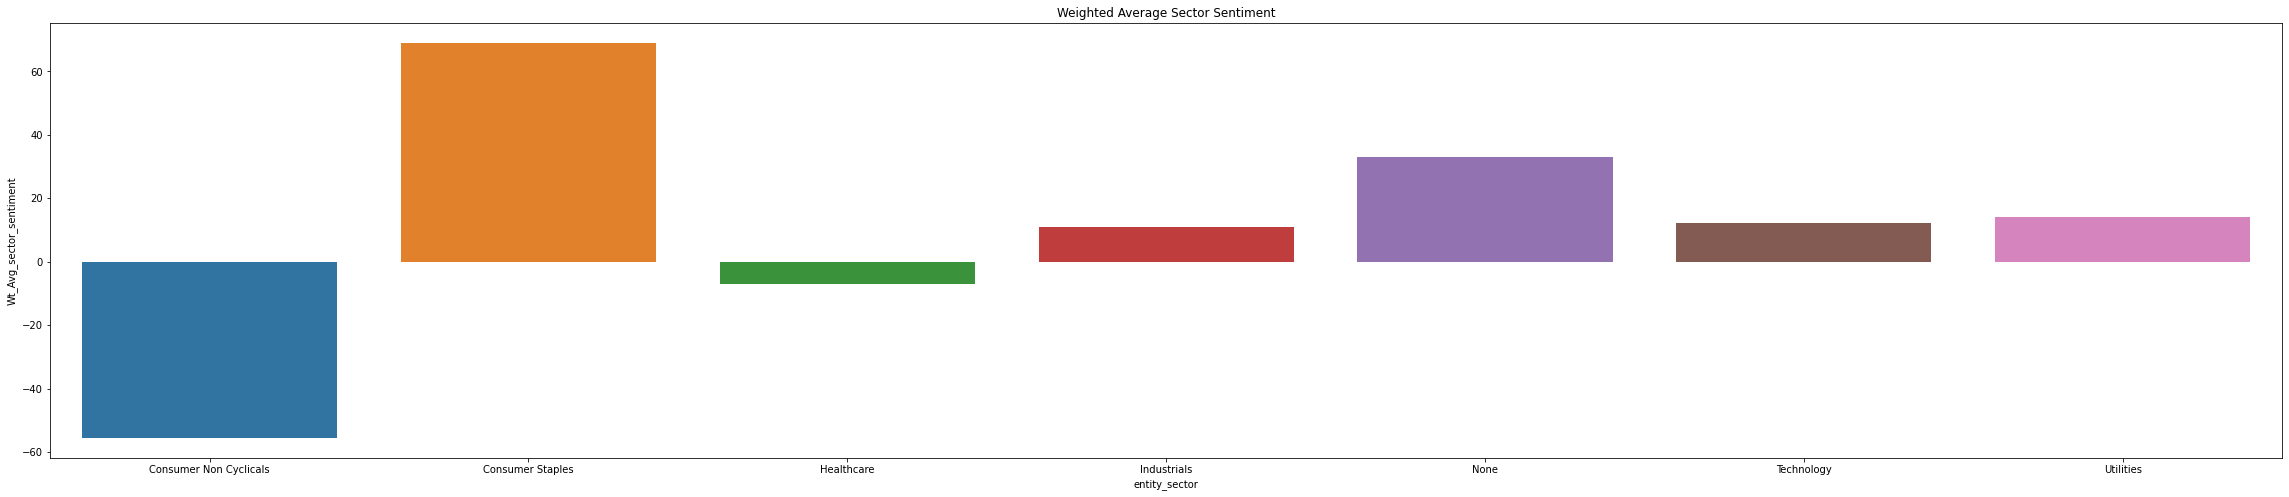

In [39]:
plt.figure(figsize=(40, 8))
plt.title('Weighted Average Sector Sentiment')
sns.barplot(result6['entity_sector'], result6['Wt_Avg_sector_sentiment'])

#### Hover info

In [40]:
#Entity hover info
entity_hoverinfo = temp_data.assign(entity_hover_info = temp_data.entity_region.astype(str)+', ' +\
                             temp_data.entity_country.astype(str)+', '+\
                            'AVG Sentiment: '+round(temp_data['Avg Entity Sentiment'],2).astype(str))

entity_hoverinfo = entity_hoverinfo[['entity_name','entity_hover_info']]
entity_hoverinfo

,entity_name,entity_hover_info
0,INMED PHARMACEUTICALS INC,"Americas, Canada, AVG Sentiment: -25.0"
1,Adani Green Energy Ltd,"Asia, India, AVG Sentiment: 14.06"
2,BOMBARDIER INC-A,"Americas, Canada, AVG Sentiment: 10.81"
3,BOMBARDIER INC-A,"Americas, Canada, AVG Sentiment: 10.81"
4,Procter & Gamble Company,"Asia, India, AVG Sentiment: -55.56"
5,TEIJIN LTD,"None, None, AVG Sentiment: 7.14"
6,Alphabet Inc,"Europe, United Kingdom, AVG Sentiment: 12.27"
7,Illumina Inc,"Europe, United Kingdom, AVG Sentiment: 11.11"
8,YAMAHA CORP,"None, None, AVG Sentiment: 59.16"
9,AGTHIA GROUP PJSC,"Middle East, United Arab Emirates, AVG Sentime..."


In [41]:
#Event hover info
event_hoverinfo = temp_data.assign(event_hoverinfo = 'No. Documents: '+ temp_data['doc_count_per_event'].astype(str)+', '+\
                            'AVG Sentiment: '+round(temp_data['Avg Event Sentiment'],2).astype(str))

event_hoverinfo = event_hoverinfo[['event','event_hoverinfo']]
event_hoverinfo

,event,event_hoverinfo
0,Environment - Water Waste Management - SASB,"No. Documents: 1, AVG Sentiment: 1.04"
1,Environment - Energy Management - SASB,"No. Documents: 5, AVG Sentiment: 30.61"
2,Environment - Energy Management - SASB,"No. Documents: 5, AVG Sentiment: 30.61"
3,Environment - Energy Management - SASB,"No. Documents: 5, AVG Sentiment: 30.61"
4,Environment - GHG Emissions - SASB,"No. Documents: 1, AVG Sentiment: 11.81"
5,Social - Data Security - SASB,"No. Documents: 1, AVG Sentiment: 12.1"
6,Governance - Product Design & Lifecycle Manage...,"No. Documents: 2, AVG Sentiment: 43.01"
7,Environment - Energy Management - SASB,"No. Documents: 5, AVG Sentiment: 30.61"
8,Governance - Product Design & Lifecycle Manage...,"No. Documents: 2, AVG Sentiment: 43.01"
9,Environment - Energy Management - SASB,"No. Documents: 5, AVG Sentiment: 30.61"


In [42]:
#Sector hover info
sector_hoverinfo = temp_data.assign(sector_hoverinfo = 'No. Documents: '+ temp_data['doc_count_per_sector'].astype(str)+', '+\
                            'AVG Sentiment: '+round(temp_data['Wt_Avg_sector_sentiment'],2).astype(str))
sector_hoverinfo = sector_hoverinfo[['entity_sector','sector_hoverinfo']]
sector_hoverinfo

,entity_sector,sector_hoverinfo
0,Healthcare,"No. Documents: 2, AVG Sentiment: -6.94"
1,Utilities,"No. Documents: 1, AVG Sentiment: 14.06"
2,Industrials,"No. Documents: 2, AVG Sentiment: 10.81"
3,Industrials,"No. Documents: 2, AVG Sentiment: 10.81"
4,Consumer Non Cyclicals,"No. Documents: 1, AVG Sentiment: -55.56"
5,None,"No. Documents: 2, AVG Sentiment: 33.15"
6,Technology,"No. Documents: 1, AVG Sentiment: 12.27"
7,Healthcare,"No. Documents: 2, AVG Sentiment: -6.94"
8,None,"No. Documents: 2, AVG Sentiment: 33.15"
9,Consumer Staples,"No. Documents: 1, AVG Sentiment: 68.99"


# KG SetUp<a class="anchor" id="Section_5"></a>

#### Creating  df with AVG Sentiment for each node:<a class="anchor" id="Section_51"></a>

In [43]:
#Entity
entity_name_nodes = temp_data.groupby('entity_name')['entity_sentiment'].mean().reset_index(name = "Avg Entity Sentiment")
#Event
event_nodes = temp_data.groupby('event')['event_sentiment'].mean().reset_index(name = "Avg Event Sentiment")
#Entity Sector
entity_sector_nodes = result6
#Doc title
#doc_avg_sentiment = temp_data.groupby('doc_title')['doc_sentiment'].mean().reset_index(name = "Avg Doc Sentiment")

In [44]:
#Hover info - entity joining
entity_name_nodes = pd.merge(entity_name_nodes, entity_hoverinfo , on = 'entity_name', how = 'left')
#deduplicate
entity_name_nodes= entity_name_nodes.drop_duplicates(subset=['entity_name'], keep='first')

entity_name_nodes

,entity_name,Avg Entity Sentiment,entity_hover_info
0,AGTHIA GROUP PJSC,68.9931,"Middle East, United Arab Emirates, AVG Sentime..."
1,Adani Green Energy Ltd,14.0625,"Asia, India, AVG Sentiment: 14.06"
2,Alphabet Inc,12.2685,"Europe, United Kingdom, AVG Sentiment: 12.27"
3,BOMBARDIER INC-A,10.8120,"Americas, Canada, AVG Sentiment: 10.81"
5,INMED PHARMACEUTICALS INC,-25.0000,"Americas, Canada, AVG Sentiment: -25.0"
6,Illumina Inc,11.1111,"Europe, United Kingdom, AVG Sentiment: 11.11"
7,Procter & Gamble Company,-55.5556,"Asia, India, AVG Sentiment: -55.56"
8,TEIJIN LTD,7.1429,"None, None, AVG Sentiment: 7.14"
9,YAMAHA CORP,59.1611,"None, None, AVG Sentiment: 59.16"


In [45]:
#Hover info - event joining
event_nodes = pd.merge(event_nodes, event_hoverinfo , on = 'event', how = 'left')
#deduplicate
event_nodes= event_nodes.drop_duplicates(subset=['event'], keep='first')
event_nodes

,event,Avg Event Sentiment,event_hoverinfo
0,Environment - Energy Management - SASB,30.60658,"No. Documents: 5, AVG Sentiment: 30.61"
5,Environment - GHG Emissions - SASB,11.80560,"No. Documents: 1, AVG Sentiment: 11.81"
6,Environment - Water Waste Management - SASB,1.04170,"No. Documents: 1, AVG Sentiment: 1.04"
7,Governance - Product Design & Lifecycle Manage...,43.00955,"No. Documents: 2, AVG Sentiment: 43.01"
9,Social - Data Security - SASB,12.10320,"No. Documents: 1, AVG Sentiment: 12.1"


In [46]:
#Hover info - entity sector joining
entity_sector_nodes = pd.merge(entity_sector_nodes, sector_hoverinfo , on = 'entity_sector', how = 'left')
#deduplicate
entity_sector_nodes= entity_sector_nodes.drop_duplicates(subset=['entity_sector'], keep='first')

entity_sector_nodes

,entity_sector,Wt_Avg_sector_sentiment,sector_hoverinfo
0,Consumer Non Cyclicals,-55.55560,"No. Documents: 1, AVG Sentiment: -55.56"
1,Consumer Staples,68.99310,"No. Documents: 1, AVG Sentiment: 68.99"
2,Healthcare,-6.94445,"No. Documents: 2, AVG Sentiment: -6.94"
4,Industrials,10.81200,"No. Documents: 2, AVG Sentiment: 10.81"
6,None,33.15200,"No. Documents: 2, AVG Sentiment: 33.15"
8,Technology,12.26850,"No. Documents: 1, AVG Sentiment: 12.27"
9,Utilities,14.06250,"No. Documents: 1, AVG Sentiment: 14.06"


#### Creating nodes from unique df with sentiment

In [47]:
#entity
node_df1 = entity_name_nodes.rename(columns={"entity_name": "node", "Avg Entity Sentiment": "AVG Sentiment",'entity_hover_info':'Hover_info'})
#sector 
node_df2 = entity_sector_nodes.rename(columns={"entity_sector": "node", "Wt_Avg_sector_sentiment": "AVG Sentiment",'sector_hoverinfo':'Hover_info'})
#event
node_df3 = event_nodes.rename(columns={"event": "node", "Avg Event Sentiment": "AVG Sentiment",'event_hoverinfo':'Hover_info'})
#doc 
#node_df4 = doc_avg_sentiment.rename(columns={"doc_title": "node", "Avg Doc Sentiment": "AVG Sentiment"})

#### Column to Determine Shapes of Nodes

In [48]:
#entity shape index
node_df1['shape_index'] = 0   #circle

#sector shape index
node_df2['shape_index'] = 5   #triangle up

#doc shape index
#node_df4['shape_index'] = 1   #square 

#event shape index

#assigning default value as 3 (#cross)
node_df3['shape_index'] = 3     

#running loop to check E, S or G and assign index respectively 
for i in range(len(node_df3['node'])):
    if node_df3.iloc[i, 0].startswith('Environment'):
        node_df3.iloc[i,3] = 3     #cross
    elif node_df3.iloc[i, 0].startswith('Social'):
        node_df3.iloc[i, 3] = 4     #X
    else:
        node_df3.iloc[i, 3] = 17    #star

## Determine Node size

#### Column to determine node size

In [49]:
#entity size
node_df1 = pd.merge(node_df1, temp_data, left_on='node', right_on='entity_name')
node_df1 = node_df1[['node','AVG Sentiment','Hover_info','shape_index','doc_count_per_entity']]
node_df1.rename(columns={'doc_count_per_entity':'size'}, inplace=True)
node_df1

,node,AVG Sentiment,Hover_info,shape_index,size
0,AGTHIA GROUP PJSC,68.9931,"Middle East, United Arab Emirates, AVG Sentime...",0,1
1,Adani Green Energy Ltd,14.0625,"Asia, India, AVG Sentiment: 14.06",0,1
2,Alphabet Inc,12.2685,"Europe, United Kingdom, AVG Sentiment: 12.27",0,1
3,BOMBARDIER INC-A,10.8120,"Americas, Canada, AVG Sentiment: 10.81",0,2
4,BOMBARDIER INC-A,10.8120,"Americas, Canada, AVG Sentiment: 10.81",0,2
5,INMED PHARMACEUTICALS INC,-25.0000,"Americas, Canada, AVG Sentiment: -25.0",0,1
6,Illumina Inc,11.1111,"Europe, United Kingdom, AVG Sentiment: 11.11",0,1
7,Procter & Gamble Company,-55.5556,"Asia, India, AVG Sentiment: -55.56",0,1
8,TEIJIN LTD,7.1429,"None, None, AVG Sentiment: 7.14",0,1
9,YAMAHA CORP,59.1611,"None, None, AVG Sentiment: 59.16",0,1


In [50]:
#sector size 
node_df2 = pd.merge(node_df2, temp_data, left_on='node', right_on='entity_sector')
node_df2 = node_df2[['node','AVG Sentiment','Hover_info','shape_index','doc_count_per_sector']]
node_df2.rename(columns={'doc_count_per_sector':'size'}, inplace=True)
node_df2

,node,AVG Sentiment,Hover_info,shape_index,size
0,Consumer Non Cyclicals,-55.55560,"No. Documents: 1, AVG Sentiment: -55.56",5,1
1,Consumer Staples,68.99310,"No. Documents: 1, AVG Sentiment: 68.99",5,1
2,Healthcare,-6.94445,"No. Documents: 2, AVG Sentiment: -6.94",5,2
3,Healthcare,-6.94445,"No. Documents: 2, AVG Sentiment: -6.94",5,2
4,Industrials,10.81200,"No. Documents: 2, AVG Sentiment: 10.81",5,2
5,Industrials,10.81200,"No. Documents: 2, AVG Sentiment: 10.81",5,2
6,None,33.15200,"No. Documents: 2, AVG Sentiment: 33.15",5,2
7,None,33.15200,"No. Documents: 2, AVG Sentiment: 33.15",5,2
8,Technology,12.26850,"No. Documents: 1, AVG Sentiment: 12.27",5,1
9,Utilities,14.06250,"No. Documents: 1, AVG Sentiment: 14.06",5,1


In [51]:
#event size
node_df3 = pd.merge(node_df3, temp_data, left_on='node', right_on='event')
node_df3 = node_df3[['node','AVG Sentiment','Hover_info','shape_index','doc_count_per_event']]
node_df3.rename(columns={'doc_count_per_event':'size'}, inplace=True)
node_df3

,node,AVG Sentiment,Hover_info,shape_index,size
0,Environment - Energy Management - SASB,30.60658,"No. Documents: 5, AVG Sentiment: 30.61",3,5
1,Environment - Energy Management - SASB,30.60658,"No. Documents: 5, AVG Sentiment: 30.61",3,5
2,Environment - Energy Management - SASB,30.60658,"No. Documents: 5, AVG Sentiment: 30.61",3,5
3,Environment - Energy Management - SASB,30.60658,"No. Documents: 5, AVG Sentiment: 30.61",3,5
4,Environment - Energy Management - SASB,30.60658,"No. Documents: 5, AVG Sentiment: 30.61",3,5
5,Environment - GHG Emissions - SASB,11.80560,"No. Documents: 1, AVG Sentiment: 11.81",3,1
6,Environment - Water Waste Management - SASB,1.04170,"No. Documents: 1, AVG Sentiment: 1.04",3,1
7,Governance - Product Design & Lifecycle Manage...,43.00955,"No. Documents: 2, AVG Sentiment: 43.01",17,2
8,Governance - Product Design & Lifecycle Manage...,43.00955,"No. Documents: 2, AVG Sentiment: 43.01",17,2
9,Social - Data Security - SASB,12.10320,"No. Documents: 1, AVG Sentiment: 12.1",4,1


In [52]:
#combining all df
all_nodes = pd.concat([node_df1,node_df2,node_df3])

In [53]:
#binning the sentiments values 
# -100 to -50 --> dark red
# -50 to -10 --> red
# -10 to 10 --> white
# 10 to 50 --> green
# 50 to 100 --> dark green

all_nodes['color'] = np.where(all_nodes['AVG Sentiment'] > 50, '#006400',
                                                   (np.where(all_nodes['AVG Sentiment'] > 10, '#90ee90',
                                                        (np.where(all_nodes['AVG Sentiment'] > -10, '#ffffff',
                                                             (np.where(all_nodes['AVG Sentiment'] > -50 , '#ff0000', '#8b0000')))))))

all_nodes

,node,AVG Sentiment,Hover_info,shape_index,size,color
0,AGTHIA GROUP PJSC,68.99310,"Middle East, United Arab Emirates, AVG Sentime...",0,1,#006400
1,Adani Green Energy Ltd,14.06250,"Asia, India, AVG Sentiment: 14.06",0,1,#90ee90
2,Alphabet Inc,12.26850,"Europe, United Kingdom, AVG Sentiment: 12.27",0,1,#90ee90
3,BOMBARDIER INC-A,10.81200,"Americas, Canada, AVG Sentiment: 10.81",0,2,#90ee90
4,BOMBARDIER INC-A,10.81200,"Americas, Canada, AVG Sentiment: 10.81",0,2,#90ee90
5,INMED PHARMACEUTICALS INC,-25.00000,"Americas, Canada, AVG Sentiment: -25.0",0,1,#ff0000
6,Illumina Inc,11.11110,"Europe, United Kingdom, AVG Sentiment: 11.11",0,1,#90ee90
7,Procter & Gamble Company,-55.55560,"Asia, India, AVG Sentiment: -55.56",0,1,#8b0000
8,TEIJIN LTD,7.14290,"None, None, AVG Sentiment: 7.14",0,1,#ffffff
9,YAMAHA CORP,59.16110,"None, None, AVG Sentiment: 59.16",0,1,#006400


In [54]:
for n in range(len(all_nodes)):
    spl = str(all_nodes.iloc[n, 2]).split(", ")
    info = "<br>".join(spl)
    print(info)

Middle East<br>United Arab Emirates<br>AVG Sentiment: 68.99
Asia<br>India<br>AVG Sentiment: 14.06
Europe<br>United Kingdom<br>AVG Sentiment: 12.27
Americas<br>Canada<br>AVG Sentiment: 10.81
Americas<br>Canada<br>AVG Sentiment: 10.81
Americas<br>Canada<br>AVG Sentiment: -25.0
Europe<br>United Kingdom<br>AVG Sentiment: 11.11
Asia<br>India<br>AVG Sentiment: -55.56
None<br>None<br>AVG Sentiment: 7.14
None<br>None<br>AVG Sentiment: 59.16
No. Documents: 1<br>AVG Sentiment: -55.56
No. Documents: 1<br>AVG Sentiment: 68.99
No. Documents: 2<br>AVG Sentiment: -6.94
No. Documents: 2<br>AVG Sentiment: -6.94
No. Documents: 2<br>AVG Sentiment: 10.81
No. Documents: 2<br>AVG Sentiment: 10.81
No. Documents: 2<br>AVG Sentiment: 33.15
No. Documents: 2<br>AVG Sentiment: 33.15
No. Documents: 1<br>AVG Sentiment: 12.27
No. Documents: 1<br>AVG Sentiment: 14.06
No. Documents: 5<br>AVG Sentiment: 30.61
No. Documents: 5<br>AVG Sentiment: 30.61
No. Documents: 5<br>AVG Sentiment: 30.61
No. Documents: 5<br>AVG Senti

In [55]:
#for n in range(len(all_nodes)):
#    spl = str(all_nodes.iloc[n, 2]).split(",")
#    all_nodes['Hover_info'] = "\n".join(spl)
#    print(all_nodes['Hover_info'])

In [56]:
nodes_list=all_nodes['node']
nodes_list

0                                    AGTHIA GROUP PJSC
1                               Adani Green Energy Ltd
2                                         Alphabet Inc
3                                     BOMBARDIER INC-A
4                                     BOMBARDIER INC-A
5                            INMED PHARMACEUTICALS INC
6                                         Illumina Inc
7                             Procter & Gamble Company
8                                           TEIJIN LTD
9                                          YAMAHA CORP
0                               Consumer Non Cyclicals
1                                     Consumer Staples
2                                           Healthcare
3                                           Healthcare
4                                          Industrials
5                                          Industrials
6                                                 None
7                                                 None
8         

### Sentiment Filtering

In [57]:
#AND FILTERS based on All Nodes to find specific sentiment ranges
#all_nodes = all_nodes[(all_nodes['AVG Sentiment'] >= -30) & (all_nodes['AVG Sentiment']<= 100)]

#all_nodes

### Edge Width

In [58]:
entity_event_df_d = data.groupby(['entity_name', 'event'])['doc_id'].count().reset_index(name = 'doc_count')

/Users/shashank/opt/anaconda3/envs/Anomaly/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='doc_count'>

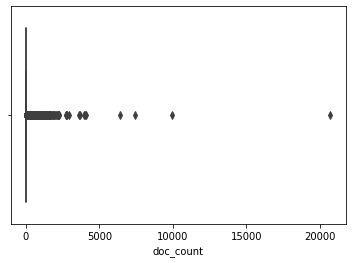

In [59]:
sns.boxplot(entity_event_df_d['doc_count'])

#### Binning the document counts for edge width as following:

* less than 2500 -> 0.5
* 2500-5000 -> 2.5
* greater than 5000 -> 5.0

### Entity - Event Document Count

In [60]:
entity_event_df = temp_data.groupby(['entity_name', 'event'])['doc_id'].count().reset_index(name = 'doc_count')
entity_event_df

,entity_name,event,doc_count
0,AGTHIA GROUP PJSC,Environment - Energy Management - SASB,1
1,Adani Green Energy Ltd,Environment - Energy Management - SASB,1
2,Alphabet Inc,Governance - Product Design & Lifecycle Manage...,1
3,BOMBARDIER INC-A,Environment - Energy Management - SASB,2
4,INMED PHARMACEUTICALS INC,Environment - Water Waste Management - SASB,1
5,Illumina Inc,Environment - Energy Management - SASB,1
6,Procter & Gamble Company,Environment - GHG Emissions - SASB,1
7,TEIJIN LTD,Social - Data Security - SASB,1
8,YAMAHA CORP,Governance - Product Design & Lifecycle Manage...,1


In [61]:
entity_event_df['edge_width'] = np.where(entity_event_df['doc_count'] > 5000, 5.0,
                                                   (np.where(entity_event_df['doc_count'] > 2500, 2.5, 0.5)))

In [62]:
entity_event_df = entity_event_df.rename(columns = {'entity_name': 'source', 'event' : 'destination'})

### Entity - Sector Document Count

In [63]:
entity_sector_df = temp_data.groupby(['entity_name', 'entity_sector'])['doc_id'].count().reset_index(name = 'doc_count')
entity_sector_df

,entity_name,entity_sector,doc_count
0,AGTHIA GROUP PJSC,Consumer Staples,1
1,Adani Green Energy Ltd,Utilities,1
2,Alphabet Inc,Technology,1
3,BOMBARDIER INC-A,Industrials,2
4,INMED PHARMACEUTICALS INC,Healthcare,1
5,Illumina Inc,Healthcare,1
6,Procter & Gamble Company,Consumer Non Cyclicals,1
7,TEIJIN LTD,None,1
8,YAMAHA CORP,None,1


In [64]:
entity_sector_df['edge_width'] = 1      # since one-to-one relation

In [65]:
entity_sector_df

,entity_name,entity_sector,doc_count,edge_width
0,AGTHIA GROUP PJSC,Consumer Staples,1,1
1,Adani Green Energy Ltd,Utilities,1,1
2,Alphabet Inc,Technology,1,1
3,BOMBARDIER INC-A,Industrials,2,1
4,INMED PHARMACEUTICALS INC,Healthcare,1,1
5,Illumina Inc,Healthcare,1,1
6,Procter & Gamble Company,Consumer Non Cyclicals,1,1
7,TEIJIN LTD,None,1,1
8,YAMAHA CORP,None,1,1


In [66]:
entity_sector_df = entity_sector_df.rename(columns = { 'entity_sector' : 'source', 'entity_name': 'destination'})

### Concatenating above 2 dfs to create a consolidated dataframe of edges

In [67]:
edge_width_df = pd.concat([entity_event_df, entity_sector_df])
edge_width_df

,source,destination,doc_count,edge_width
0,AGTHIA GROUP PJSC,Environment - Energy Management - SASB,1,0.5
1,Adani Green Energy Ltd,Environment - Energy Management - SASB,1,0.5
2,Alphabet Inc,Governance - Product Design & Lifecycle Manage...,1,0.5
3,BOMBARDIER INC-A,Environment - Energy Management - SASB,2,0.5
4,INMED PHARMACEUTICALS INC,Environment - Water Waste Management - SASB,1,0.5
5,Illumina Inc,Environment - Energy Management - SASB,1,0.5
6,Procter & Gamble Company,Environment - GHG Emissions - SASB,1,0.5
7,TEIJIN LTD,Social - Data Security - SASB,1,0.5
8,YAMAHA CORP,Governance - Product Design & Lifecycle Manage...,1,0.5
0,Consumer Staples,AGTHIA GROUP PJSC,1,1.0


#### Dummy values for testing

edge_width_df.iloc[1, 2] = 5
edge_width_df.iloc[4, 2] = 5
edge_width_df.iloc[10, 2] = 5


In [68]:
edge_width_df

,source,destination,doc_count,edge_width
0,AGTHIA GROUP PJSC,Environment - Energy Management - SASB,1,0.5
1,Adani Green Energy Ltd,Environment - Energy Management - SASB,1,0.5
2,Alphabet Inc,Governance - Product Design & Lifecycle Manage...,1,0.5
3,BOMBARDIER INC-A,Environment - Energy Management - SASB,2,0.5
4,INMED PHARMACEUTICALS INC,Environment - Water Waste Management - SASB,1,0.5
5,Illumina Inc,Environment - Energy Management - SASB,1,0.5
6,Procter & Gamble Company,Environment - GHG Emissions - SASB,1,0.5
7,TEIJIN LTD,Social - Data Security - SASB,1,0.5
8,YAMAHA CORP,Governance - Product Design & Lifecycle Manage...,1,0.5
0,Consumer Staples,AGTHIA GROUP PJSC,1,1.0


### Graphing

In [69]:
# create empty graph instance
G = nx.Graph()

In [70]:
# add nodes
for i in nodes_list:
    G.add_node(i)

In [71]:
G.nodes()

NodeView(('AGTHIA GROUP PJSC', 'Adani Green Energy Ltd', 'Alphabet Inc', 'BOMBARDIER INC-A', 'INMED PHARMACEUTICALS INC', 'Illumina Inc', 'Procter & Gamble Company', 'TEIJIN LTD', 'YAMAHA CORP', 'Consumer Non Cyclicals', 'Consumer Staples', 'Healthcare', 'Industrials', 'None', 'Technology', 'Utilities', 'Environment - Energy Management - SASB', 'Environment - GHG Emissions - SASB', 'Environment - Water Waste Management - SASB', 'Governance - Product Design & Lifecycle Management - SASB', 'Social - Data Security - SASB'))

In [72]:
#Creating edge list for relationships
for i,j in temp_data.iterrows():
    #G.add_edges_from([(j["event"],j["doc_title"])]) #rls 1
    #G.add_edges_from([(j["entity_name"],j["doc_title"])]) #rls 2
    G.add_edges_from([(j["entity_sector"],j["entity_name"])]) #rls 3
    G.add_edges_from([(j["event"],j["entity_name"])]) #rls 4

In [73]:
# getting positions of each node
pos = nx.spring_layout(G, k=0.5, iterations=50)
pos

{'AGTHIA GROUP PJSC': array([0.53041041, 0.29924046]),
 'Adani Green Energy Ltd': array([ 0.15464914, -0.28540786]),
 'Alphabet Inc': array([-0.75914869,  0.18829177]),
 'BOMBARDIER INC-A': array([ 0.51769205, -0.42548707]),
 'INMED PHARMACEUTICALS INC': array([ 0.84562345, -0.12950522]),
 'Illumina Inc': array([0.3662015 , 0.09190043]),
 'Procter & Gamble Company': array([-0.06332373,  0.78078054]),
 'TEIJIN LTD': array([-0.62552935, -0.51952257]),
 'YAMAHA CORP': array([-1.        , -0.11640487]),
 'Consumer Non Cyclicals': array([0.03653263, 0.48340516]),
 'Consumer Staples': array([0.54478082, 0.60588813]),
 'Healthcare': array([0.70590006, 0.06208854]),
 'Industrials': array([ 0.61789476, -0.62376389]),
 'None': array([-0.72614122, -0.22464155]),
 'Technology': array([-0.58623963,  0.34127878]),
 'Utilities': array([-0.09851323, -0.37006149]),
 'Environment - Energy Management - SASB': array([ 0.40885833, -0.09131397]),
 'Environment - GHG Emissions - SASB': array([-0.24192698,  0

In [74]:
# add positions to graph

for n, p in pos.items():
    G.nodes[n]['pos'] = p

In [75]:
# function for creating edges with width as an argument for each edge

def make_edge(x, y, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = '#888'),
                       hoverinfo = 'none',
                       mode      = 'lines')

In [76]:
middle_node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=go.Marker(
        opacity=0
    )
)


# creating edge trace
edge_trace = []
edge_hover_text = []
for i in range(len(edge_width_df)):
    x0, y0 = G.nodes[edge_width_df.iloc[i, 0]]['pos']
    x1, y1 = G.nodes[edge_width_df.iloc[i, 1]]['pos']
    
    trace  = make_edge([x0, x1, None], [y0, y1, None],  
                           width = edge_width_df.iloc[i, 2])
    edge_trace.append(trace)
    
    middle_node_trace['x'] += tuple([(x0+x1)/2])
    middle_node_trace['y'] += tuple([(y0+y1)/2])
    edge_hover_text.append("No. of Docs: " + str(edge_width_df.iloc[i, 2]))
    
middle_node_trace['text'] = edge_hover_text


/Users/shashank/opt/anaconda3/envs/Anomaly/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




#### sizing of nodes based on degrees

In [87]:
d = nx.degree(G)
node_sizes = all_nodes['size'] * 5
#node_sizes = all_nodes['size']
#for i in d:
 #   _, value = i
  #  node_sizes.append(3*value+10)    
    
    

#### shapes of nodes based on event_groups

In [88]:
symbols = all_nodes['shape_index']

In [89]:
for n in range(len(all_nodes)):
    text = str(all_nodes.iloc[n, 0]) + "\r\n" + str(all_nodes.iloc[n, 2])
    print(text)

AGTHIA GROUP PJSC
Middle East, United Arab Emirates, AVG Sentiment: 68.99
Adani Green Energy Ltd
Asia, India, AVG Sentiment: 14.06
Alphabet Inc
Europe, United Kingdom, AVG Sentiment: 12.27
BOMBARDIER INC-A
Americas, Canada, AVG Sentiment: 10.81
BOMBARDIER INC-A
Americas, Canada, AVG Sentiment: 10.81
INMED PHARMACEUTICALS INC
Americas, Canada, AVG Sentiment: -25.0
Illumina Inc
Europe, United Kingdom, AVG Sentiment: 11.11
Procter & Gamble Company
Asia, India, AVG Sentiment: -55.56
TEIJIN LTD
None, None, AVG Sentiment: 7.14
YAMAHA CORP
None, None, AVG Sentiment: 59.16
Consumer Non Cyclicals
No. Documents: 1, AVG Sentiment: -55.56
Consumer Staples
No. Documents: 1, AVG Sentiment: 68.99
Healthcare
No. Documents: 2, AVG Sentiment: -6.94
Healthcare
No. Documents: 2, AVG Sentiment: -6.94
Industrials
No. Documents: 2, AVG Sentiment: 10.81
Industrials
No. Documents: 2, AVG Sentiment: 10.81
None
No. Documents: 2, AVG Sentiment: 33.15
None
No. Documents: 2, AVG Sentiment: 33.15
Technology
No. Docu

## adding everything together

In [90]:
#adjusting colour scale
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    marker_symbol = symbols,
    marker_line_color="black", 
    marker_line_width=2,
    hoverinfo='text',
    marker=dict(
        showscale=False,
        #colorscale=#based on max-min
        #            [[0,"rgb(160,44,51)"], #dark red
        #            [0.25,"rgb(227,26,28)"], #red
        #            [0.5,"rgb(255,255,255)"], #white
        #            [0.75,"rgb(51,160,44)"], #green
        #            [1,"rgb(22,68,19)"]], # dark green
        reversescale=False,
        color=all_nodes['color'],
        size=node_sizes,
        colorbar=dict(
            thickness=10,
            title='Sentiment Range',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

# logic for hover information    
hover_text_list = []
for n in range(len(all_nodes)):
    x, y = G.nodes[all_nodes.iloc[n, 0]]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    spl = str(all_nodes.iloc[n, 2]).split(", ")
    info = "<br>".join(spl)
    hover_text_list.append(str(all_nodes.iloc[n, 0] + "<br>" + info))
    
node_trace['text'] = hover_text_list

#### hover info<a class="anchor" id="Section_52"></a>

#colour based on adjancecy --> Loan to update
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    print(adjacencies[0])
    node_info = adjacencies[0] +'<br> # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [91]:
#Counting events within ESG Event groups 
E_count = len(temp_data[temp_data['event_group'] == 'Environment'])
S_count = len(temp_data[temp_data['event_group'] == 'Social'])
G_count = len(temp_data[temp_data['event_group'] == 'Governance'])

In [92]:
# creating custom layout

layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)', # transparent background
    plot_bgcolor='rgba(0,0,0,0)', # transparent 2nd background
    xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
    yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
    title = '<br> ESG Knowledge Graph </br>',
    titlefont = dict(size = 20),
    xaxis_title=('Number of Events in <br> Environment: '+ str(E_count)+ '   Social: '+str(S_count)+ '   Governance: '+str(G_count))
)

In [93]:
fig = go.Figure(layout = layout)

# Add all edge traces
for trace in edge_trace:
    fig.add_trace(trace)
    
# Add node trace
fig.add_trace(node_trace)

# Add hidden node trace for edge hover info
fig.add_trace(middle_node_trace)

# Remove legend
fig.update_layout(showlegend = False)

# Remove tick labels
fig.update_xaxes(showticklabels = False)
fig.update_yaxes(showticklabels = False)

# Show figure
fig.show()

## Plotting

In [94]:
print("Nodes to be shown =", temp_data.entity_name.nunique()+temp_data.entity_sector.nunique()+temp_data.event.nunique(),#+temp_data.doc_title.nunique(),
      "\n > entity_name:", temp_data.entity_name.nunique()
     ,"\n > entity_sector:", temp_data.entity_sector.nunique()
     ,"\n > event_group:", temp_data.event_group.nunique())
    # ,"\n > doc_title:", temp_data.doc_title.nunique())


temp_data[["entity_name", "entity_sector","event","doc_title",'Avg Entity Sentiment','Avg Event Sentiment','Wt_Avg_sector_sentiment']]

Nodes to be shown = 21 
 > entity_name: 9 
 > entity_sector: 7 
 > event_group: 3


,entity_name,entity_sector,event,doc_title,Avg Entity Sentiment,Avg Event Sentiment,Wt_Avg_sector_sentiment
0,INMED PHARMACEUTICALS INC,Healthcare,Environment - Water Waste Management - SASB,THE EFFECTS OF WASTEWATER TREATMENT PLANT EFFL...,-25.0000,1.04170,-6.94445
1,Adani Green Energy Ltd,Utilities,Environment - Energy Management - SASB,Adani Green jumps 5% on commissioning of new p...,14.0625,30.60658,14.06250
2,BOMBARDIER INC-A,Industrials,Environment - Energy Management - SASB,Print - Bombardiers joint venture wins contrac...,10.8120,30.60658,10.81200
3,BOMBARDIER INC-A,Industrials,Environment - Energy Management - SASB,Bombardiers joint venture wins contract to bui...,10.8120,30.60658,10.81200
4,Procter & Gamble Company,Consumer Non Cyclicals,Environment - GHG Emissions - SASB,Design and systems-level performance analysis ...,-55.5556,11.80560,-55.55560
5,TEIJIN LTD,None,Social - Data Security - SASB,"Analysts Downgrades for January, 1st (SAUHF, S...",7.1429,12.10320,33.15200
6,Alphabet Inc,Technology,Governance - Product Design & Lifecycle Manage...,Google will finally stop using controversial I...,12.2685,43.00955,12.26850
7,Illumina Inc,Healthcare,Environment - Energy Management - SASB,Occurrence of Thermophilic Microorganisms in D...,11.1111,30.60658,-6.94445
8,YAMAHA CORP,None,Governance - Product Design & Lifecycle Manage...,Monster Energy Star Yamaha Racing Announces 20...,59.1611,43.00955,33.15200
9,AGTHIA GROUP PJSC,Consumer Staples,Environment - Energy Management - SASB,Monster Energy Star Yamaha Racing Announces 20...,68.9931,30.60658,68.99310


/Users/shashank/opt/anaconda3/envs/Anomaly/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='size'>

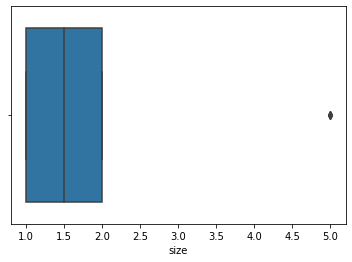

In [85]:
sns.boxplot(all_nodes['size'])

In [86]:
all_nodes

,node,AVG Sentiment,Hover_info,shape_index,size,color
0,AGTHIA GROUP PJSC,68.99310,"Middle East, United Arab Emirates, AVG Sentime...",0,1,#006400
1,Adani Green Energy Ltd,14.06250,"Asia, India, AVG Sentiment: 14.06",0,1,#90ee90
2,Alphabet Inc,12.26850,"Europe, United Kingdom, AVG Sentiment: 12.27",0,1,#90ee90
3,BOMBARDIER INC-A,10.81200,"Americas, Canada, AVG Sentiment: 10.81",0,2,#90ee90
4,BOMBARDIER INC-A,10.81200,"Americas, Canada, AVG Sentiment: 10.81",0,2,#90ee90
5,INMED PHARMACEUTICALS INC,-25.00000,"Americas, Canada, AVG Sentiment: -25.0",0,1,#ff0000
6,Illumina Inc,11.11110,"Europe, United Kingdom, AVG Sentiment: 11.11",0,1,#90ee90
7,Procter & Gamble Company,-55.55560,"Asia, India, AVG Sentiment: -55.56",0,1,#8b0000
8,TEIJIN LTD,7.14290,"None, None, AVG Sentiment: 7.14",0,1,#ffffff
9,YAMAHA CORP,59.16110,"None, None, AVG Sentiment: 59.16",0,1,#006400
